# 第七章　給湯設備 / Chapter 7 Hot water supply system

## 第一節　給湯設備 / Section 1 Hot water supply system

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pyhees.section2_1_c import get_n_p
from pyhees.section2_1_b import get_f_prim
from pyhees.section7_1 import calc_E_E_W_d_t, calc_E_G_W_d_t, calc_E_K_W_d_t


# 試算例

In [2]:
def get_default_hot_water_demand():

  base = {'region' : 6, 'sol_region' : None, 'A_A' : 120, 'L_HWH' : None, 'heating_flag_d' : None}

  HW = {'hw_type' : 'ガス潜熱回収型給湯機', 'e_rtd' : 0.836, 'e_dash_rtd' : None, 'hybrid_category' : None,
        'bath_function' : 'ふろ給湯機(追焚あり)', 'has_bath' : True, 'pipe_diameter' : '上記以外',
        'kitchen_watersaving_A' : True, 'kitchen_watersaving_C' : True,  'shower_watersaving_A' : True,
        'shower_watersaving_B' : True, 'washbowl_watersaving_C' : True, 'bath_insulation' : True}

  return base, HW

In [3]:
def calc_results(base, HW):

    L_HWH = base['L_HWH']
    region = base['region']
    sol_region = base['sol_region']
    heating_flag_d = base['heating_flag_d']
    A_A = base['A_A']
    n_p = get_n_p(A_A)
    SHC = None

    temp_E = calc_E_E_W_d_t(n_p, L_HWH, heating_flag_d, region, sol_region, HW, SHC)
    temp_G = calc_E_G_W_d_t(n_p, L_HWH, heating_flag_d, A_A, region, sol_region, HW, SHC)
    temp_K = calc_E_K_W_d_t(n_p, L_HWH, heating_flag_d, A_A, region, sol_region, HW, SHC)
    
    f_prim = get_f_prim()
    Ene_TOTAL = temp_E * f_prim / 1000 + temp_G + temp_K

    print('給湯用一次エネルギー消費量 = {}MJ/年'.format(np.sum(Ene_TOTAL)))

    return {'Ene_TOTAL': Ene_TOTAL}


In [4]:
def get_each_graph(_results):

    results_sum_day = np.sum(_results.reshape(365,24), axis = 1)
    results_mean_hour = np.mean(_results.reshape(365,24), axis = 0)

    fig = plt.figure(figsize = (20,12))
    grh1 = fig.add_subplot(311)
    grh1.set_ylabel('MJ/h')
    grh1.set_xlabel('hour')
    grh1.plot(_results)

    grh_day = fig.add_subplot(312)
    grh_day.set_ylabel('MJ/d')
    grh_day.set_xlabel('day')
    grh_day.plot(results_sum_day)

    grh_hour = fig.add_subplot(313)
    grh_hour.plot(results_mean_hour)
    grh_hour.set_ylabel('MJ/h')
    grh_hour.set_xlabel('hour')

    plt.show()


### 計算条件1

初期条件での計算

In [5]:
base, HW = get_default_hot_water_demand()

testcase1 = calc_results(base, HW)['Ene_TOTAL']


L_ba = 925.6601666666666
W_k = 35806.0
W_s = 58690.0
W_w = 9454.0
W_b1 = 0.0
W_b2 = 60300.0
W_ba1 = 0.0
W_dash_k = 28493.92
W_dash_s = 39909.200000000004
W_dash_w = 8266.0
W_dash_b1 = 0.0
W_dash_b2 = 60300.0
W_dash_ba1 = 0.0
L_dash_k = 3008.0006653587266
L_dash_s = 4039.436673392339
L_dash_w = 873.1431472010277
L_dash_b1 = 0.0
L_dash_b2 = 6097.813467345601
L_dash_ba1 = 0.0
L_dash_ba2 = 1157.0752083333334
L_dashdash_k = 3008.0006653587266
L_dashdash_s = 4039.436673392339
L_dashdash_w = 873.1431472010277
L_dashdash_b1 = 0.0
L_dashdash_b2 = 6097.813467345601
L_dashdash_ba1 = 0.0
L_dashdash_ba2 = 1157.0752083333334
E_E_hs_aux1 = 34.246169905555554
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 11.213348844328705
給湯用一次エネルギー消費量 = 19781.824037368642MJ/年


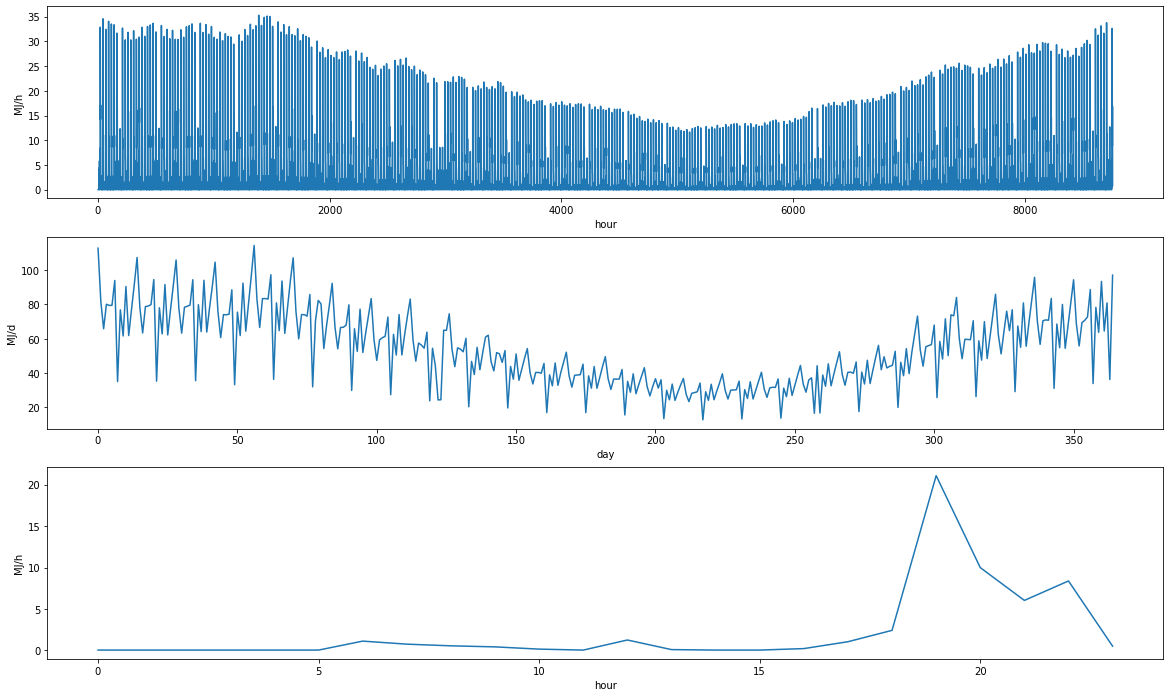

In [6]:
get_each_graph(testcase1)

### 計算条件2

- 石油潜熱回収型給湯機（効率81.9%）に変更

In [7]:
base, HW = get_default_hot_water_demand()

HW['hw_type'] = '石油潜熱回収型給湯機'
HW['e_rtd'] = 0.819

testcase2 = calc_results(base, HW)['Ene_TOTAL']

給湯用一次エネルギー消費量 = 19902.69757233081MJ/年


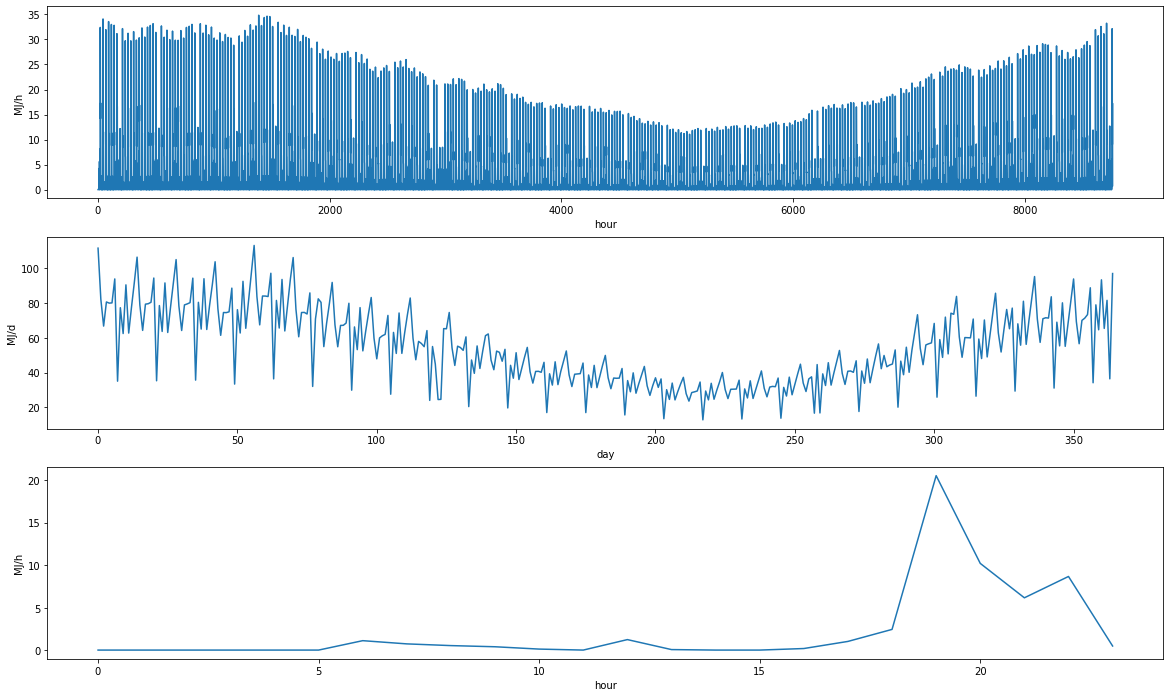

In [8]:
get_each_graph(testcase2)

### 計算条件3

- @@@@
- @@@@

## 比較